In [1]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn -v

Using pip 21.2.4 from /Users/apichet/opt/anaconda3/lib/python3.9/site-packages/pip (python 3.9)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys
import sklearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

load the data

In [15]:
df = pd.read_csv('/Users/apichet/Downloads/NFLX.csv')
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


In [16]:
df.shape

(4874, 7)

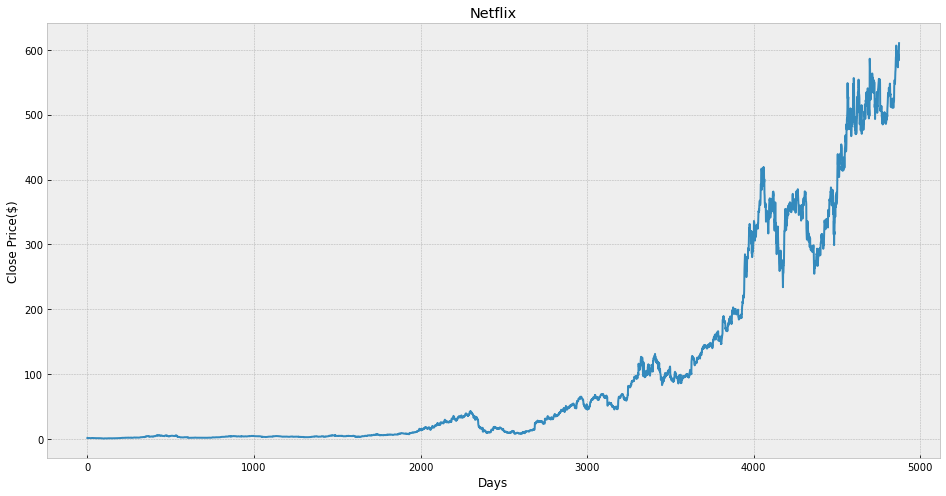

In [42]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price($)')
plt.plot(df['Close'])
plt.show()

In [44]:
df = df[['Close']]
df.head(4)

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571


In [48]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
4870,592.640015,NaN
4871,583.849976,NaN
4872,599.059998,NaN
4873,610.340027,NaN


In [49]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [553.330017]
 [553.409973]
 [547.580017]]


/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_27491/1011343711.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))[:-future_days]


In [50]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  0.999286   1.027857   1.172857 ... 583.849976 599.059998 610.340027]


Split the data into 75% training and 25% testing

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Create Models

In [53]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(X, y)

In [54]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_27491/3450743164.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[511.769989],
       [515.409973],
       [516.48999 ],
       [518.909973],
       [519.299988],
       [514.25    ],
       [517.570007],
       [515.150024],
       [510.820007],
       [517.349976],
       [524.890015],
       [520.549988],
       [519.969971],
       [515.840027],
       [512.400024],
       [510.720001],
       [515.919983],
       [517.919983],
       [518.909973],
       [521.869995],
       [543.710022],
       [546.880005],
       [553.330017],
       [553.409973],
       [547.580017]])

Show the models tree prediction

In [56]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[510.299988  558.919983  552.780029  590.650024  539.450012  588.549988
 590.530029  606.710022  589.349976  597.539978  598.719971  554.580017
 565.169983  582.869995  586.5       589.349976  575.429993  573.140015
 590.650024  593.26001   592.390015  592.640015  583.849976  560.3599855
 610.340027 ]

[521.72953457 525.43122897 526.52955602 528.99056615 529.38719327
 524.25159039 527.62788307 525.16687293 520.76344707 527.40412177
 535.07199069 530.65838512 530.06853481 525.86857388 522.37025085
 520.66174562 525.94988541 527.98379238 528.99056615 532.00077083
 554.21106233 557.43478758 563.99414974 564.07546127 558.14666722]


Visualize Data

/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_27491/734209122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


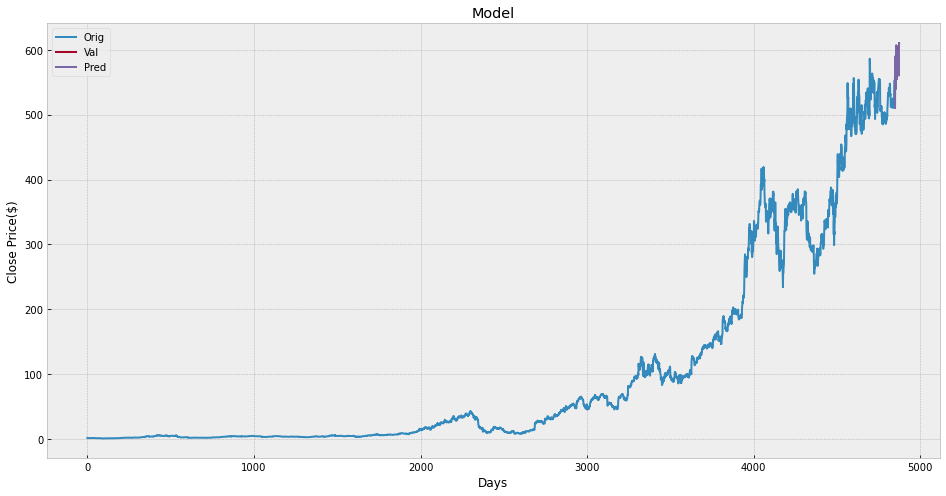

In [59]:
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_27491/2377631430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


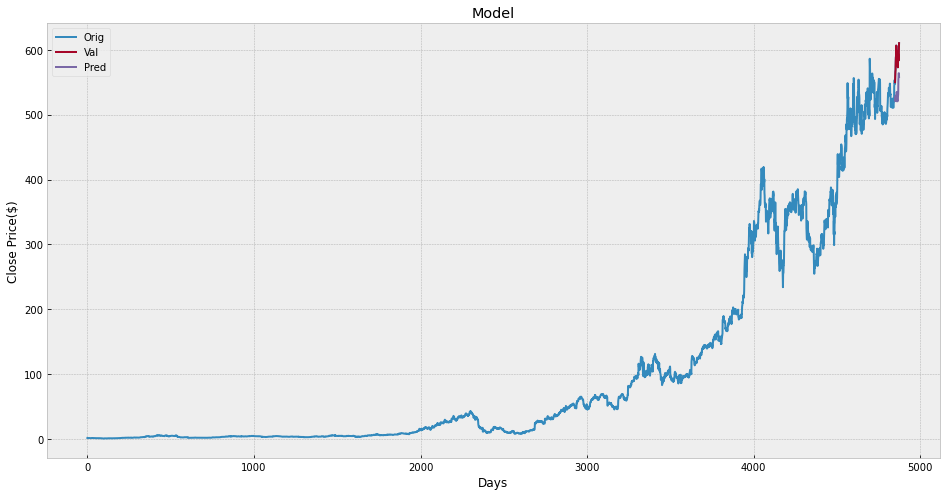

In [60]:
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()